In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv('Day11.csv')

In [5]:
X = dataset.iloc[:,[3,4]].values

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
#X

In [22]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3,min_samples=10,metric='euclidean')
model.fit(X)

DBSCAN(eps=0.3, min_samples=10)

In [23]:
la = model.labels_
la

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  3, -1,  1,  0,  3,  2,  1,  2,  1, -1,  1,  2,  3,
        2,  1,  2,  1,  2,  3, -1,  3,  2,  3, -1,  1, -1,  3, -1,  3, -1,
        1, -1,  3,  2,  1,  2,  1, -1,  1,  2,  3, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [24]:
core = np.zeros_like(la,dtype=bool)
core[model.core_sample_indices_]=True

cluster = len(set(la)) - (1 if -1 in la else 0)
cluster

4

In [26]:
y_means = model.fit_predict(X)
y_means

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  3, -1,  1,  0,  3,  2,  1,  2,  1, -1,  1,  2,  3,
        2,  1,  2,  1,  2,  3, -1,  3,  2,  3, -1,  1, -1,  3, -1,  3, -1,
        1, -1,  3,  2,  1,  2,  1, -1,  1,  2,  3, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

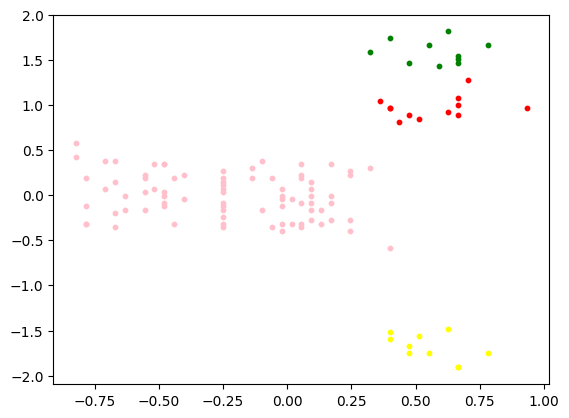

In [25]:
y_means = model.fit_predict(X)
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], s=10, c='pink')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], s=10, c='red')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], s=10, c='yellow')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], s=10, c='green')
plt.scatter(X[y_means == 4,0], X[y_means == 4,1], s=10, c='blue')
plt.scatter(X[y_means == 5,0], X[y_means == 5,1], s=10, c='violet')
plt.scatter(X[y_means == 6,0], X[y_means == 6,1], s=10, c='cyan')
plt.scatter(X[y_means == 7,0], X[y_means == 7,1], s=10, c='orange')

# Example 1:

In [66]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from mpl_toolkits import mplot3d

In [67]:
df = pd.DataFrame(np.load('clusterable_data.npy'),
                          columns=['x', 'y'])

In [68]:
df.shape

(2309, 2)

<Axes: xlabel='x', ylabel='y'>

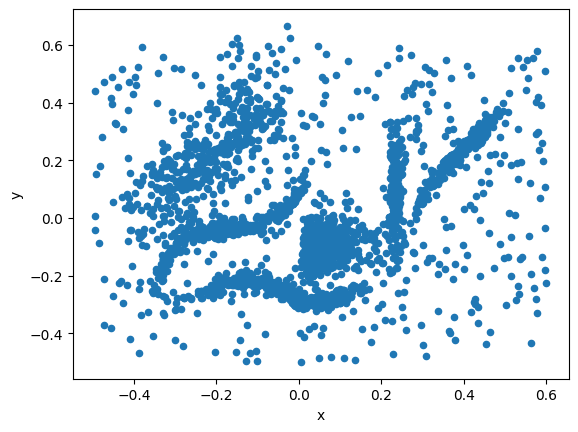

In [69]:
df.plot(kind='scatter',x='x',y='y')

In [75]:
dbscan = DBSCAN(eps=0.033,
               min_samples=22,
               algorithm='auto',
               p=0.9)
preds = dbscan.fit_predict(df)

In [76]:
la = dbscan.labels_
la

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

In [77]:
len(dbscan.core_sample_indices_)

1364

In [78]:
#Our sihouette score is bad
silhouette_score(df, preds)

0.19592842860298926

<Axes: xlabel='x', ylabel='y'>

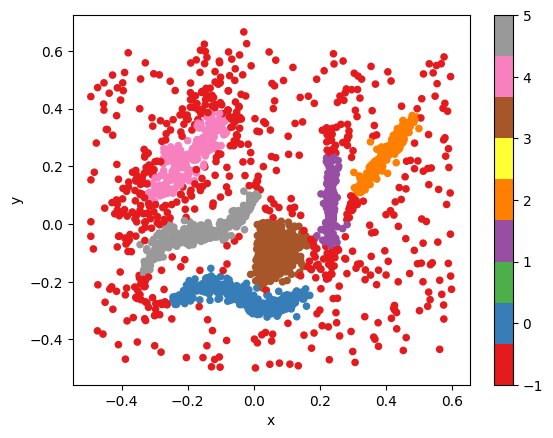

In [80]:
df.plot(kind='scatter', x='x',y='y',c=preds, cmap='Set1')


# Example: College Application:

In [123]:
df = pd.read_csv('college.csv')
df.shape


(777, 18)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [125]:
X = df.iloc[:,1:]

In [126]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [127]:
#Model Building: K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)


C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [128]:
la = kmeans.labels_
la

array([0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,

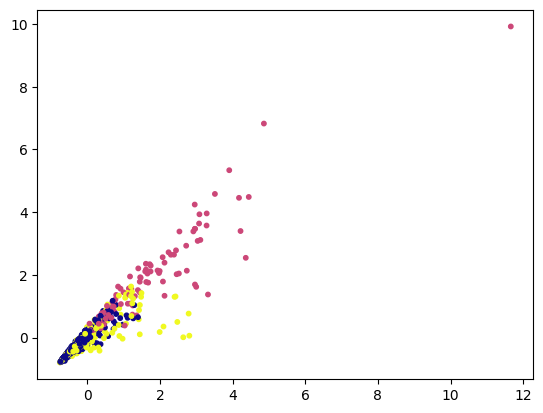

In [129]:
plt.scatter(X[:,0],X[:,1],c=la, cmap='plasma',s=10)

In [130]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
dbscan.fit_predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [131]:
la1 = dbscan.labels_
la1

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

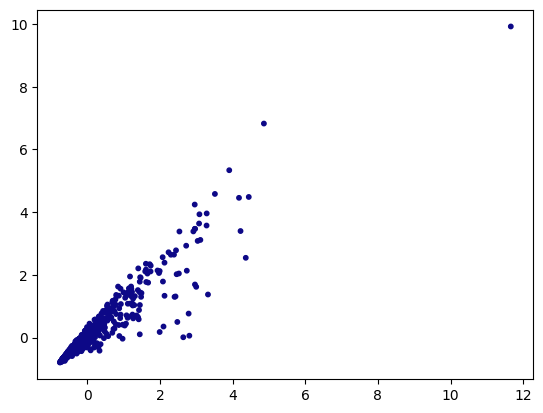

In [132]:
plt.scatter(X[:,0],X[:,1],c=la1, cmap='plasma',s=10)

In [133]:
df.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [134]:
for i in df.columns:
    print(i,len(df[i].unique()))

Private 2
Apps 711
Accept 693
Enroll 581
Top10perc 82
Top25perc 89
F.Undergrad 714
P.Undergrad 566
Outstate 640
Room.Board 553
Books 122
Personal 294
PhD 78
Terminal 65
S.F.Ratio 173
perc.alumni 61
Expend 744
Grad.Rate 81


In [135]:
df1 = df .copy()


In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1['Grad_Rate1'] = scaler.fit_transform(df1[['Grad.Rate']])
df1['Room_Board1'] = scaler.fit_transform(df1[['Room.Board']])

<Axes: xlabel='Room_Board1', ylabel='Grad_Rate1'>

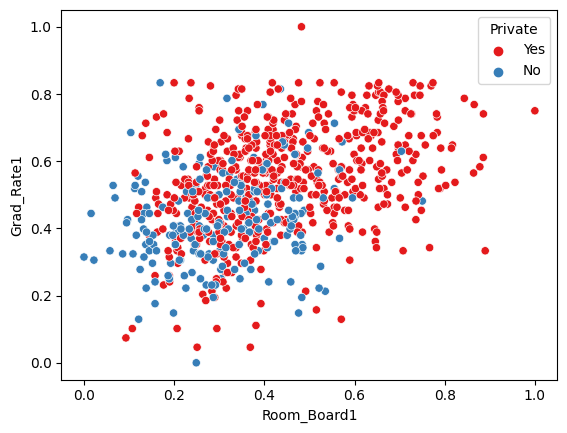

In [137]:
import seaborn as sns
sns.scatterplot(x='Room_Board1',y='Grad_Rate1', data=df1,hue='Private',palette='Set1')

In [138]:
df1['Outstate1'] = scaler.fit_transform(df1[['Outstate']])
df1['P.Undergrad1'] = scaler.fit_transform(df1[['P.Undergrad']])

<Axes: xlabel='Outstate1', ylabel='P.Undergrad1'>

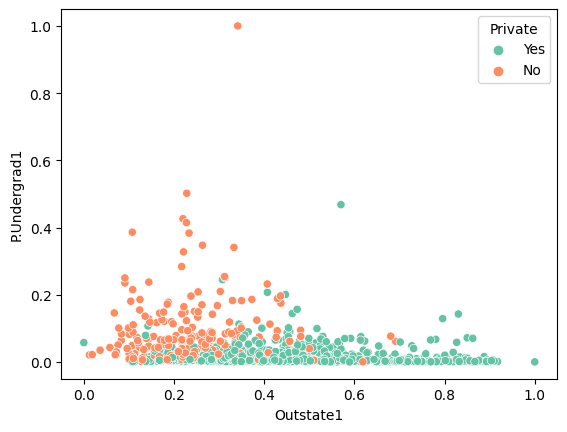

In [139]:
sns.scatterplot(x='Outstate1',y='P.Undergrad1', data=df1,hue='Private',palette='Set2')

In [141]:
#Try: Outstate and Alumni
df1['Outstate1'] = scaler.fit_transform(df1[['Outstate']])
df1['P.perc.alumni1'] = scaler.fit_transform(df1[['perc.alumni']])


<Axes: xlabel='Outstate1', ylabel='P.perc.alumni1'>

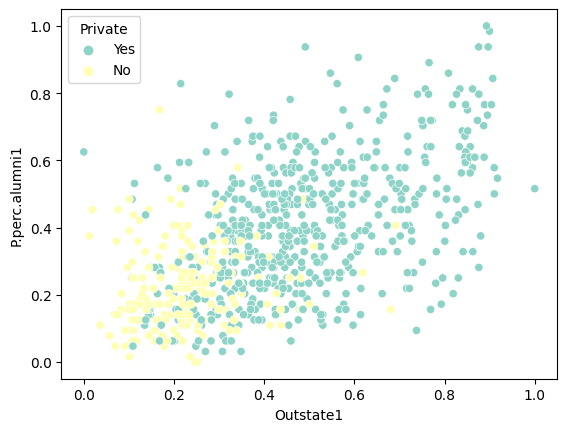

In [143]:
sns.scatterplot(x='Outstate1',y='P.perc.alumni1', data=df1,hue='Private',palette='Set3')

In [144]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('Private',axis=1))

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=2)

In [145]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [146]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [147]:
df['Cluster'] = df['Private'].apply(converter)

In [148]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

